#### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def calc_std_feat(x):
    return (x - x.mean()) / x.std()

In [22]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

In [23]:
def eval_model_reg2(X, y, lambda_, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

In [7]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [8]:
X_st = X.copy().astype(np.float64)

In [9]:
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [24]:
lambda_ = np.linspace(1e-4, 0.5, 300)

In [11]:
W_1 = []
W_2 = []
W_3 = []
for i in lambda_:
    W = eval_model_reg2(X_st, y, i, iterations=5000, alpha=1e-2)
    W_1.append(W[1])
    W_2.append(W[2])
    W_3.append(W[3])

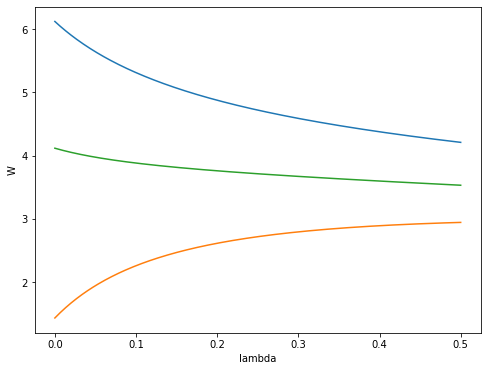

In [19]:
plt.figure(figsize=(8, 6))
plt.xlabel('lambda')
plt.ylabel('W')
plt.plot(lambda_, W_1, label='W_1')
plt.plot(lambda_, W_2, label='W_2')
plt.plot(lambda_, W_3, label='W_3')
plt.show()

#### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Использование нормализации и стандартизации вместе не имеет практического смысла. Исходя из основных свойств этих приемов масшабирования результатом нормализациии является сужение диапазона номинальных признаков от 0 до 1. После стандартизации данных, каждый признак будет иметь среднее 0 и дисперсию 1. В итоге признаки будут отмасштабированы в диапазоне, соответствующем выводу последнего примененного метода масштабирования.

#### Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [13]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        
    return W